170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - loss: 0.0525 - val_loss: 0.0299
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - loss: 0.0281 - val_loss: 0.0253
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - loss: 0.0238 - val_loss: 0.0222
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - loss: 0.0214 - val_loss: 0.0205
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - loss: 0.0199 - val_loss: 0.0192
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - loss: 0.0188 - val_loss: 0.0184
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - loss: 0.0179 - val_loss: 0.0174
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - loss: 0.0170 - val_loss: 0.0169
Epoch 9/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - loss: 0.0165 - val_loss: 0.0163
Epoch 10/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 11/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step

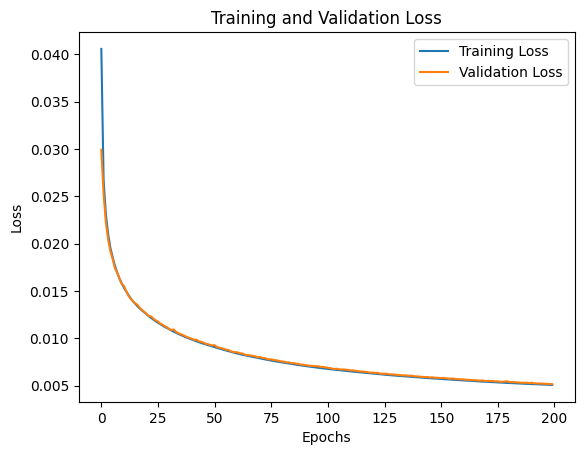

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0052
Test Loss: 0.005131924524903297
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


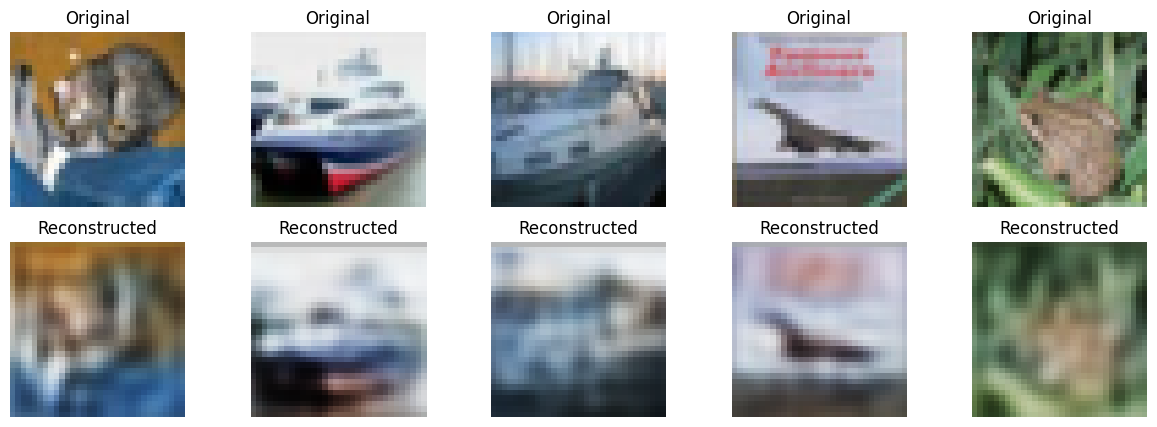

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data: scale pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data for LSTM input (sequence length 32, features 32*3 for RGB channels)
# Each image is reshaped into a sequence of 32 rows and 96 features (32*3 for RGB)
x_train = x_train.reshape(-1, 32, 32 * 3)
x_test = x_test.reshape(-1, 32, 32 * 3)

# Split the training data into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, x_train, test_size=0.2, random_state=42)

# Define the LSTM autoencoder model with increased latent space size and added layers
input_img = Input(shape=(32, 32 * 3))  # Input shape: sequence length of 32, 32*3 features

# Encoder with two LSTM layers
encoded = LSTM(512, activation='tanh', return_sequences=True)(input_img)  # First LSTM layer
encoded = LSTM(256, activation='tanh')(encoded)  # Second LSTM layer

# Latent space representation
latent_space = RepeatVector(32)(encoded)

# Decoder with two LSTM layers
decoded = LSTM(256, activation='tanh', return_sequences=True)(latent_space)  # First LSTM layer in the decoder
decoded = LSTM(32 * 3, activation='sigmoid', return_sequences=True)(decoded)  # Second LSTM layer in the decoder

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with Adam optimizer and a reduced learning rate
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Set up early stopping to monitor validation loss and stop training if no improvement after 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model for 200 epochs, using early stopping to stop when validation loss stops improving
history = autoencoder.fit(x_train, x_train, epochs=200, batch_size=128, validation_data=(x_val, x_val), callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss: {test_loss}")

# Generate reconstructed images using the trained autoencoder
reconstructed = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
n = 5  # Number of images to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(32, 32, 3))
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


# The Original images to understand what the classes of images look like

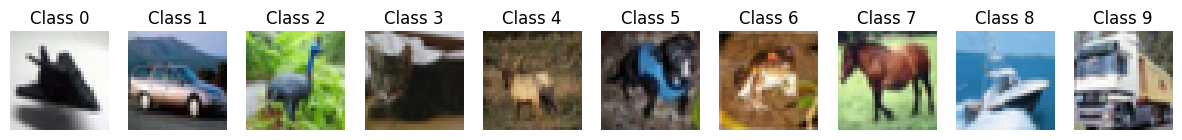

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Get unique labels (classes)
unique_labels = np.unique(y_train)

# Create a figure and axes
plt.figure(figsize=(15, 3))

# Iterate through unique labels
for i in range(10):
  # Find an image with the current label
  index = np.where(y_train == i)[0][0]
  image = x_train[index]

  # Create a subplot for each image
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(image)
  plt.title(f"Class {i}")
  plt.axis("off")

# Show the plot
plt.show()


# Pixel representation of the images after normalization

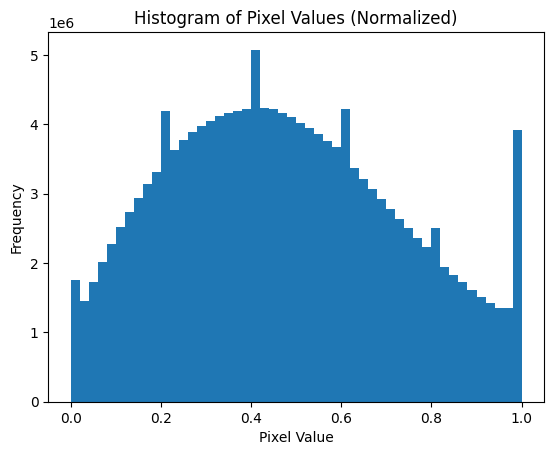

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data: scale pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Flatten the normalized image data
flattened_images = x_train.reshape(-1)

# Create a histogram of the pixel values
plt.hist(flattened_images, bins=50)  # Adjust the number of bins for better visualization
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values (Normalized)')
plt.show()


# Mean variances of images to access the brightness

In [8]:
import numpy as np
import pandas as pd

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data: scale pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Calculate mean and variance for each image
means = []
variances = []

for image in x_train:
  means.append(np.mean(image))
  variances.append(np.var(image))

# Create a Pandas DataFrame to store and display the data
data = {'Mean Pixel Intensity (Normalized)': means, 'Variance': variances}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
# Optionally, you can round the values for better readability
# df = df.round(2)

# Display the rounded DataFrame
print(df.round(2))



       Mean Pixel Intensity (Normalized)  Variance
0                               0.405676  0.041542
1                               0.511166  0.056251
2                               0.524473  0.104832
3                               0.314605  0.020457
4                               0.405784  0.056382
...                                  ...       ...
49995                           0.594171  0.058287
49996                           0.572502  0.096438
49997                           0.411914  0.087331
49998                           0.664484  0.050202
49999                           0.517177  0.051731

[50000 rows x 2 columns]
       Mean Pixel Intensity (Normalized)  Variance
0                                   0.41      0.04
1                                   0.51      0.06
2                                   0.52      0.10
3                                   0.31      0.02
4                                   0.41      0.06
...                                  ...       ...
49995

# Relationships between pixel values accross the RGB colour channels

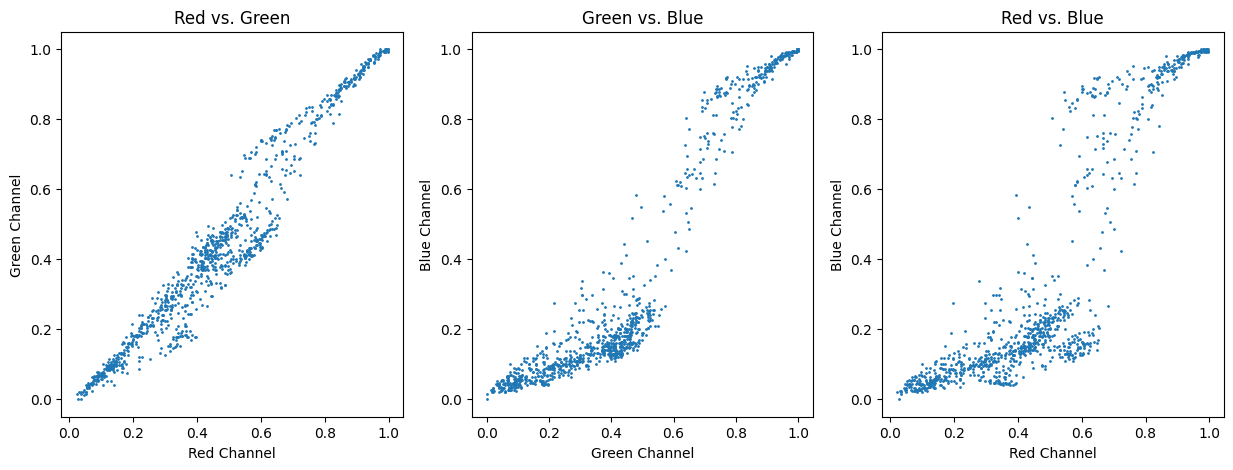

Correlation between Red and Green: 0.9741234363831361
Correlation between Green and Blue: 0.9332290393269796
Correlation between Red and Blue: 0.8661948968530371


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (optional, but helps with visualization)
x_train = x_train.astype('float32') / 255.0

# Choose a random image from the training set
image_index = np.random.randint(0, len(x_train))
image = x_train[image_index]

# Extract the red, green, and blue channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Create a scatter plot for Red vs Green, Green vs Blue, and Red vs Blue
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(red_channel.flatten(), green_channel.flatten(), s=1)  # s=1 for smaller marker size
plt.xlabel('Red Channel')
plt.ylabel('Green Channel')
plt.title('Red vs. Green')

plt.subplot(1, 3, 2)
plt.scatter(green_channel.flatten(), blue_channel.flatten(), s=1)
plt.xlabel('Green Channel')
plt.ylabel('Blue Channel')
plt.title('Green vs. Blue')

plt.subplot(1, 3, 3)
plt.scatter(red_channel.flatten(), blue_channel.flatten(), s=1)
plt.xlabel('Red Channel')
plt.ylabel('Blue Channel')
plt.title('Red vs. Blue')

plt.show()

# You can also calculate correlation coefficients between the channels to quantify the relationships.
correlation_rg = np.corrcoef(red_channel.flatten(), green_channel.flatten())[0, 1]
correlation_gb = np.corrcoef(green_channel.flatten(), blue_channel.flatten())[0, 1]
correlation_rb = np.corrcoef(red_channel.flatten(), blue_channel.flatten())[0, 1]

print(f"Correlation between Red and Green: {correlation_rg}")
print(f"Correlation between Green and Blue: {correlation_gb}")
print(f"Correlation between Red and Blue: {correlation_rb}")


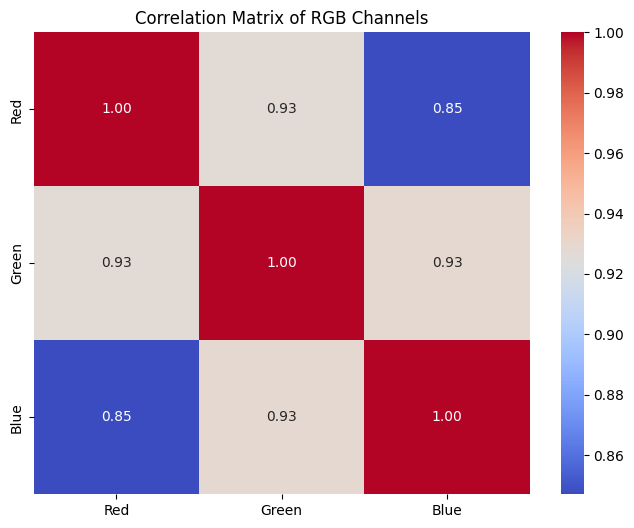

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (optional, but helps with visualization)
x_train = x_train.astype('float32') / 255.0

# Calculate correlation matrix for RGB channels
correlation_matrix = np.zeros((3, 3))
for i in range(len(x_train)):
    image = x_train[i]
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()
    channels = np.stack((red_channel, green_channel, blue_channel))
    correlation_matrix += np.corrcoef(channels)

correlation_matrix /= len(x_train)

# Create a DataFrame for the correlation matrix
df_correlation = pd.DataFrame(correlation_matrix, columns=['Red', 'Green', 'Blue'], index=['Red', 'Green', 'Blue'])

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of RGB Channels')
plt.show()
